In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/college-placement/placement-dataset.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
dataset = pd.read_csv(r"/kaggle/input/college-placement/placement-dataset.csv")
dataset = dataset[['cgpa', 'iq', 'placement']]

In [4]:
dataset.columns

Index(['cgpa', 'iq', 'placement'], dtype='object')

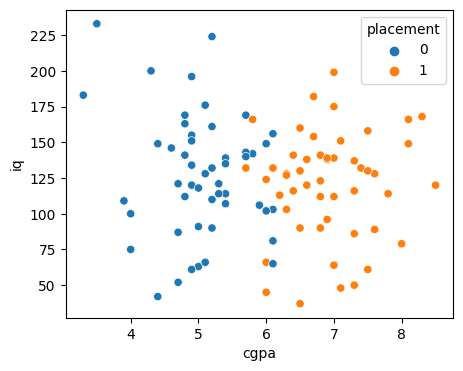

In [5]:
plt.figure(figsize=(5,4))
sns.scatterplot(x="cgpa",y="iq",data=dataset,hue="placement")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x = dataset.iloc[:,:-1]
y = dataset["placement"]


In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
lr = LogisticRegression()

In [11]:
lr.fit(x_train,y_train)

LogisticRegression()

In [12]:
lr.score(x_test,y_test)*100

85.0

In [13]:
lr.coef_

array([[3.08692455, 0.00887071]])

In [14]:
lr.intercept_

array([-19.6119019])

In [15]:
lr.predict([[7.4,132.0]])

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [16]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


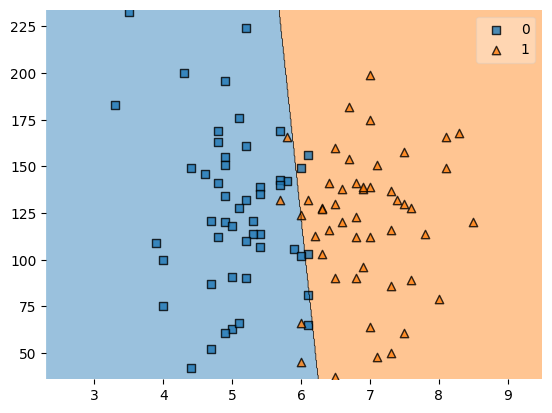

In [17]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=lr)
plt.show()